# Embodied cognition on Wikipedia: a data analysis
In what follows, an analysis of the page edits and views count for the _"Embodied cogtnition"_ article on Wikipedia is done. The data is provided by the WikipediaStatistics at en.wikipedia.org

### Load data

In [199]:
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 22})
import seaborn as sns
import numpy as np
import datetime

df_views_count = pd.read_csv('Data/wikishark_ec_page_views.csv', delimiter=",", header=0, index_col=False)
df_views_count_update = pd.read_csv('Data/wikishark_ec_page_views_updated.csv', delimiter=",", header=0, index_col=False)
df_edits_count = pd.read_csv('Data/wikishark_ec_edits_count2.csv', delimiter=",", header=0, index_col=False)

df_edits_count

,DateTime,Edits,IPs,IPs,Minor edits,Minor edits,Size
0,2002-04,7,6,85.7,2,28.6,492.0
1,2002-05,0,0,0.0,0,0.0,NaN
2,2002-06,0,0,0.0,0,0.0,NaN
3,2002-07,0,0,0.0,0,0.0,NaN
4,2002-08,0,0,0.0,0,0.0,NaN
...,...,...,...,...,...,...,...
223,2021-11,19,2,10.5,2,10.5,NaN
224,2021-12,53,1,1.9,17,32.1,NaN
225,2022-01,87,0,0.0,31,35.6,166875.0
226,2022-02,192,4,2.1,26,13.5,NaN


In [200]:
# Converting date to a datestamp type
df_views_count["DateTime"] = pd.to_datetime(df_views_count["DateTime"])
df_views_count_update["DateTime"] = pd.to_datetime(df_views_count_update["DateTime"])
df_edits_count["DateTime"] = pd.to_datetime(df_edits_count["DateTime"])

### 1. Data  preprocessing

In [201]:
# Check for missing values
print(df_edits_count.isnull().sum())
#
# Setting DateTime as index from csv files
df_views_count = df_views_count.set_index("DateTime")
df_views_count_update = df_views_count_update.set_index("DateTime")
df_edits_count = df_edits_count.set_index("DateTime")

df_edits_count.index

DateTime          0
Edits             0
IPs               0
IPs               0
Minor edits       0
Minor edits       0
Size            208
dtype: int64


DatetimeIndex(['2002-04-01', '2002-05-01', '2002-06-01', '2002-07-01',
               '2002-08-01', '2002-09-01', '2002-10-01', '2002-11-01',
               '2002-12-01', '2004-01-01',
               ...
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', name='DateTime', length=228, freq=None)

### 1. Edits count

In [202]:
df_edits_count = df_edits_count.fillna(0).astype(int)
df_edits_count

,Edits,IPs,IPs,Minor edits,Minor edits,Size
DateTime,,,,,,
2002-04-01,7,6,85,2,28,492
2002-05-01,0,0,0,0,0,0
2002-06-01,0,0,0,0,0,0
2002-07-01,0,0,0,0,0,0
2002-08-01,0,0,0,0,0,0
...,...,...,...,...,...,...
2021-11-01,19,2,10,2,10,0
2021-12-01,53,1,1,17,32,0
2022-01-01,87,0,0,31,35,166875


In [203]:
# Select the edits per year and month
edits_year = df_edits_count.index.year
print(edits_year)

Int64Index([2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2004,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022],
           dtype='int64', name='DateTime', length=228)


In [60]:
# Sum per year
edit_sum_year = df_edits_count["Edits"].groupby(edits_year).sum()
minor_sum_year = df_edits_count["Minor edits"].groupby(edits_year).sum()
editors_sum_year = df_edits_count["IPs"].groupby(edits_year).sum()
size_year = df_edits_count["Size"].groupby(edits_year).sum()

edit_sum_year  = pd.DataFrame(edit_sum_year)
edit_sum_year["Minor edits"] = pd.DataFrame(minor_sum_year)
edit_sum_year["Editors"] = pd.DataFrame(editors_sum_year)
edit_sum_year['Size'] = pd.DataFrame(size_year)
edit_sum_year2 = edit_sum_year.reset_index()
edit_sum_year2

,DateTime,Edits,Minor edits,Editors,Size
0,2002,8,2,6,492.0
1,2004,32,16,11,5566.0
2,2005,16,3,9,5782.0
3,2006,17,6,5,6699.0
4,2007,16,7,4,6896.0
5,2008,42,27,2,16678.0
6,2009,38,17,9,14475.0
7,2010,30,12,7,21183.0
8,2011,203,28,33,54061.0
9,2012,55,18,1,55732.0


In [193]:
def plot_edits_size(df, save=True):
    fig, ax1 = plt.subplots(figsize=(20, 16))
    ax2 = ax1.twinx()
    width = 0.82

    edit_sum_year2[['Edits','Minor edits','Editors']].plot(kind='bar',width=width, ax=ax1)
    edit_sum_year2[['Size']].plot(secondary_y = True, ax=ax2, color='red', marker='o')
    ax1.set_ylabel('Edits count')
    ax1.set_xlabel('Year', labelpad=10)
    ax1.set_title("Article's edits count and size per year")
    # ax1.xticks(rotation = 45)

    ax1 = plt.gca()
    # make secondary y-axis (right) start from same zero value as left y-axis
    ax1.set_ylim(bottom=0)

    ax1.set_xticklabels(edit_sum_year2.DateTime.tolist())

    # Save image high resolution image
    # Uncomment to save image
    # format can include # e.g .png, .svg, etc.
    if save:
        plt.savefig("Images/edits_count_and_size.eps", format='eps', dpi=1200)
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


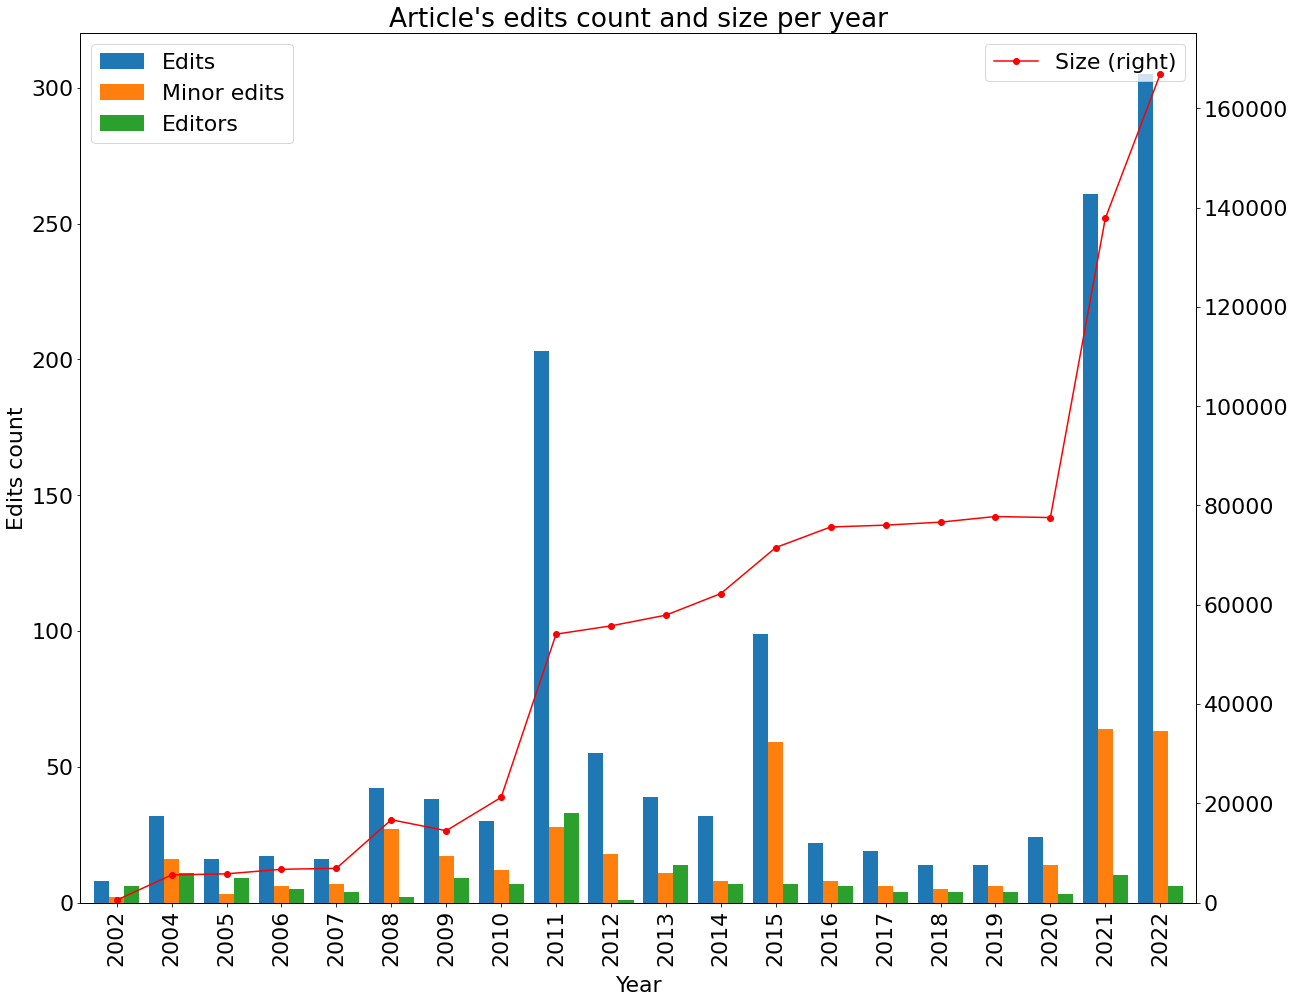

In [194]:
plot_edits_size(edit_sum_year2, save=True)

### 2. Views count

In [204]:
df_views_count
df_views_count_update

,Embodied cognition[en],Cognitive science[en],Mind[en],Cognition[en]
DateTime,,,,
2008-01-01,12,426,439,612
2008-01-02,4,600,660,1147
2008-01-03,4,641,663,1256
2008-01-04,14,627,672,1197
2008-01-05,7,521,535,864
...,...,...,...,...
2022-06-21,194,301,644,392
2022-06-22,175,303,610,422
2022-06-23,142,297,611,505


In [205]:
df_month = df_views_count.index.month
df_year = df_views_count.index.year

In [207]:
def group_moth_year(df):
    # select month and year of the data
    df_month = df.index.month
    df_year = df.index.year
    return df_month, df_year

In [208]:
moth_view, year_view = group_moth_year(df_views_count['DateTime'])
moth_view_new, year_view_new = group_moth_year(df_views_count_update['DateTime'])
moth_view_new

KeyError: 'DateTime'

In [ ]:
# Moving averages per year (52 weeks window)
views_mean = df_views_count['Embodied cognition[en]'].groupby(df_year).mean()
views_mean = pd.DataFrame(views_mean)

views_mean

In [ ]:

visualize_date(views_mean, (8,5), "line", None, "blue", "Date", "Page views", "Mean views per year", "eps", "Images/views_year.eps")
# ax = df_mean.plot()
# ax.set_xlabel("Date")
# ax.set_ylabel("Page views")
# ax.set_title("Yearly rolling mean")
#
# plt.show()

In [ ]:
views_before_project = df_views_count['2020-03-01':'2021-02-28']
views_during_project = df_views_count['2021-03-01':'2022-02-28']


views_average_1 = df_views_count['2008-03-01':'2020-02-28']

views_average_1
views_average_1_month = views_average_1.index.month
#
#
views_average_1 = views_average_1['Embodied cognition[en]'].groupby(views_average_1_month).mean()
#
# # views_during_project
# views_before_project_month = views_before_project.index.month
# views_during_project_month = views_during_project.index.month
#
views_average_1
# # views_during_project.tail(50)
#

In [ ]:
views_during_project_mean = views_during_project['Embodied cognition[en]'].groupby(views_during_project_month).mean()
views_before_project_mean = views_before_project['Embodied cognition[en]'].groupby(views_before_project_month).mean()
views_cogsci_project_mean = views_during_project['Cognitive science[en]'].groupby(views_during_project_month).sum()

mean_view_average_before = views_before_project_mean / views_average_1
mean_view_average_after = views_during_project_mean / views_average_1

# Without normalizing
mean_view = pd.DataFrame()
mean_view['Before'] = pd.DataFrame(views_before_project_mean)
mean_view['After'] = pd.DataFrame(views_during_project_mean)
# mean_view['CogSci'] = pd.DataFrame(views_cogsci_project_mean)
# mean_view
# mean_view.describe()

# Normalizing the data
mean_view_averaged = pd.DataFrame()
mean_view_averaged['Before'] = pd.DataFrame(mean_view_average_before)
mean_view_averaged['After'] = pd.DataFrame(mean_view_average_after)

mean_view_averaged.describe()

In [ ]:
# fig, ax  = plt.subplots()

ax = mean_view.plot(kind='box')
# ax = mean_view.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("monthly rolling count")

plt.show()

In [ ]:
views_before_project_mean = views_before_project['Embodied cognition[en]'].groupby(views_before_project_month)

ax = mean_view_averaged.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("Previous monthly rolling mean")

plt.show()